# **Домашнее задание 2: Градиентный спуск (pro)**

В этом задании две части - теоретическая и практическая. Теорию можно набирать, используя LaTex или просто решать на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за домашнее задание - 10.

## Часть 1 (теоретическая)

## Задание 1 (**1.5 балла**)

В случае одномерной Ridge-регрессии минимизируется функция со штрафом:
$$Q(w) = (y-xw)^T(y-xw)+\lambda w^2,$$
где $\lambda$ - положительный параметр, штрафующий функцию за слишком большие значения $w$.

1)  (**0.5 балла**) Найдите производную $\nabla_w Q(w)$, выведите формулу для оптимального $w$.

2) (**0.5 балла**) Найдите вторую производную $\nabla^2_w Q(w)$. Убедитесь, что мы оказались в точке минимума.

3) (**0.5 балла**) Выпишите шаг градиентного спуска в матричном виде.

1. $ Q(w) = (y^T - w^T X^T)(y - Xw) + \lambda w^Tw = $ <br>
$ y^T y - y^T X w - w^T X^Ty + w^T X^T X w + \lambda w^Tw = $ <br>
$ y^Ty - 2y^TXw + w^TX^TXw + \lambda w^Tw $ <br><br>
Тогда: $ \nabla_w Q(w) = 0 - 2X^Ty + (X^TX + X^TX)w + 2\lambda w = 0 \implies
X^TXw + \lambda w I = X^Ty \implies$ $$w = (X^TX + \lambda I)^{-1}X^Ty$$

2. $\nabla^2_w Q(w) = 2 X^TX + 2\lambda I$ <br><br>
Нужно понять является ли матрица $X^TX$ положительно определенной, т.е.: $z^TX^TXz > 0 \forall z >0$. В формуле записан квадрат нормы, поэтому данная матрица является положительно определенной. Также остальные слагаемые первой формулы больше нуля. Из критерия Сильвестра следует, что все главные миноры положительно определенной матрицы положительны, а значит, данная точка является минимумом.


3. $w^t = w^{t-1} - \eta \nabla_w Q(w^{t-1})$

## Часть 2 (практическая).

## Задание 2 (**1 балл**)

Дана функция: $$f(x) = x\cdot sin(5x) + 0.1 \cdot x^2$$

Для этой функции:

- [ ] Реализуйте (или возьмите рассмотренный на занятии) метод градиетного спуска с условием остановки `stop=1e^-6` и шагом `eta=0.001`. **Градиетный спуск обязательно должен сохранять траекторию движения.**
- [ ] Задайте стартовые точки x0, равные 0, 0.5, 1
- [ ] Реализуйте нахождение точек минимума и максимума функции $f(x)$ (для нахождения максимума нам нужно в направлении градиента, а не антиградиента)
- [ ] Проанализируйте результаты. Предположите, с чем они связаны. Ответьте на вопросы:
    - Чему равны значения экстремумов?
    - При старте из какой начальной точки найденные экстремумы совпадут?




In [150]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

np.random.seed(42)

In [151]:
# Функция и её производная
def f(x):
    return x * np.sin(5 * x) + 0.1 * x ** 2

def df(x):
    return np.sin(5 * x) + 5 * x * np.cos(5 * x) + 0.2 * x

# Градиентный спуск
def gradient_descent(f, df, x0, eta, max_iter=1000, tol=1e-6, find_max=False):
    path = [x0]
    x_old = x0

    if find_max:
        eta *= -1

    for i in range(max_iter):
        x_new = x_old - eta * df(x_old)
        path += [x_new]

        if abs(x_new - x_old) < tol:
            return x_new, path

        x_old = x_new
    return x_new, path

# Поиск экстремумов
def find_points(f, df, x0_list, eta, max_iter=1000, tol=1e-6, find_max=False):
    extremums = []
    for x0 in x0_list:
        extremum, path = gradient_descent(f, df, x0, eta, max_iter, tol, find_max)
        extremums += [extremum]
    return extremums

In [152]:
x0_list = [0, 0.5, 1]
eta = 0.001

print(f'Найденные точки минимума: {np.round(find_points(f, df, x0_list, eta), 3)}')
print(f'Найденные точки максимума: {np.round(find_points(f, df, x0_list, eta, find_max=True), 3)}')

Найденные точки минимума: [0.    0.975 0.975]
Найденные точки максимума: [0.    0.412 1.604]


`Мы видим, что для точек x0 = 0.5 и x0 = 1 практически совпали минимумы. Можно предположить, что данные стартовые точки попали на одну и ту же часть склона графика, что привело к тому, что градиентный спуск падал в одну и ту же точку локального минимума.`<br>
`Также мы видим, что для x0 = 0 совпали точки максимума и минимума. Скорее всего это произошло из-за того, что выбранная точка уже является экстремумом, поэтому градиент в этом месте равен 0 и градиентный спуск даже не делал шагов.`

## Задание 3 (**0.5 балла**).
Напишите функцию, вычисляющую значение весов в линейной регрессии по точной (аналитически найденной) формуле.

In [153]:
def ols_solution(X, y):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return np.linalg.inv(X.T @ X) @ X.T @ y

## Задание 5 (**1 балл**).
Модифицируйте метод градиентного спуска с семинара так, чтобы это теперь был метод стохастического градиентного спуска.

In [154]:
from tqdm import tqdm

def compute_cost(X, y, w):
    l = X.shape[0]
    return (np.linalg.norm(X @ w - y) ** 2) / l

def predict(X, w):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ w

def stochastic_gradient_descent(X, y, learning_rate, num_iterations, alpha=0, batch_size=None, disable_tqdm=False):
    """
        Стохастический градиентный спуск.

        alpha: коэффициент L2 регуляризации
    """

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    w = np.random.rand(X.shape[1])

    cost_track = [compute_cost(X, y, w)]

    # Если batch_size не определен, то по умолчанию batch_size = размер выборки.
    if not batch_size:
        batch_size = X.shape[0]

    for i in tqdm(range(num_iterations), disable=disable_tqdm):

        subset_indices = np.random.choice(X.shape[0], batch_size)
        X_subset = X[subset_indices]
        y_subset = y[subset_indices]

        w = w - (learning_rate * (2./batch_size * X_subset.T @ (X_subset @ w - y_subset) + 2 * alpha * w))

        cost_track += [compute_cost(X, y, w)]

    return w, cost_track

## Задание 6 (**3 балла**).
* **(0 баллов)**. Скопируйте метод градиентного спуска из семинара в этот ноутбук.

* **(0.5 балла)**. Обучите линейную регрессию на данных, сгенерированных ниже, тремя методами (по точной формуле, с помощью GD и с помощью SGD) на данных для задачи регрессии (см. код). Для GD и SGD используйте learning_rate = 0.01, iterations=10000.

* **(0.5 балла)**. С помощью каждого метода сделайте предсказание (на всех данных), вычислите качество предсказания r2 (from sklearn.metrics import r2_score). Для получения предсказания можете использовать функцию predict с семинара.


Ответьте на следующие вопросы (каждый вопрос - **0.5 балла**):

1) все ли методы справились с нахождением минимума? если нет, то почему какой-то из методов не справился?

2) сравните время работы методов (используйте библиотеку time): замеряйте время работы соответствующей написанной вами функции.

3) для методов GD и SGD нарисуйте графики (для каждого свой) зависимости ошибки (loss) от номера итерации.

4) какой метод успешнее всего справился с задачей? (т.е. r2 наибольший).

In [155]:
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np

X, y, _ = make_regression(n_samples=100000, #number of samples
                          n_features=10, #number of features
                          n_informative=8, #number of useful features
                          noise=100, #bias and standard deviation of the guassian noise
                          coef=True, #true coefficient used to generated the data
                          random_state=123)

X = pd.DataFrame(data=X, columns=np.arange(0, X.shape[1]))
X[10] = X[6] + X[7] + np.random.random() * 0.01

1. Решение по точной формуле:

In [156]:
%%time
w_ols = ols_solution(X, y)
y_pred = predict(X, w_ols)
print(f'OLS r2: {r2_score(y, y_pred)}')

OLS r2: 0.7511401029736604
CPU times: user 33.3 ms, sys: 12.1 ms, total: 45.4 ms
Wall time: 45.1 ms


2. Решение с помощью GD:

In [157]:
learning_rate = 0.01
num_iterations = 10000

In [158]:
%%time
# Так как не указали параметры => это full batch GD.
w_gd, cost_track_gd = stochastic_gradient_descent(X, y, learning_rate, num_iterations)
y_pred = predict(X, w_gd)
print(f'Full batch GD r2: {r2_score(y, y_pred)}')

100%|██████████| 10000/10000 [04:39<00:00, 35.84it/s]

Full batch GD r2: 0.7554621714767976
CPU times: user 4min 49s, sys: 2min 53s, total: 7min 42s
Wall time: 4min 39s


3. Решение с помощью SGD:

In [159]:
%%time
# SGD с batch_size = 1.
w_sgd, cost_track_sgd = stochastic_gradient_descent(X, y, learning_rate, num_iterations, batch_size=1, disable_tqdm=True)
y_pred = predict(X, w_sgd)
print(f'SGD r2: {r2_score(y, y_pred)}')

SGD r2: 0.7137723706917383
CPU times: user 11.1 s, sys: 3.15 s, total: 14.3 s
Wall time: 9.17 s


`1. Судя по тому, что R^2 оказался адекватным для каждого из 3 методов, то можно сделать выводы, что все 3 алгоритма нашли минимум. Хотя, качество SGD оказалось хуже, чем у остальных. Скорее всего он прыгал рядом с минимумом, но не спустился точно в него.`<br>
`2. Времы работы методов отображены в ячейках сверху. Самым быстрым оказался OLS, самым медленным - full batch GD.`

`3. График зависимости ошибки от номера итерации:`

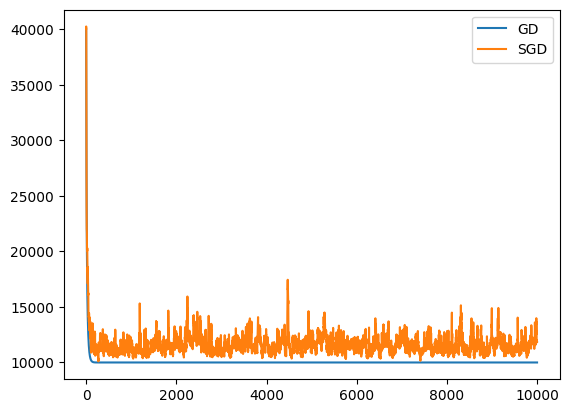

In [160]:
x = np.arange(num_iterations)
plt.plot(x, cost_track_gd[:-1], label='GD')
plt.plot(x, cost_track_sgd[:-1], label='SGD')
plt.legend()
plt.show()

`4. Лучше всего с задачей справился full batch GD.`

## Задание 7 (1.5 балла).

* **(0.5 балла)**. Добавьте в функцию из задания 5 L2-регуляризацию и, соответственно, новый аргумент - коэффициент при регуляризаторе.

* **(1 балл)**. На сгенерированных выше данных обучите модифицированный алгоритм SGD с регуляризацией: в цикле перебирайте значения коэффициента регуляризации от 0.1 до 1 с шагом 0.1. Для каждого значения обучите модель и сделайте предсказание, выведите значение r2. Для какого значения коэффициента регуляризации получилось наилучшее качество r2, почему?

`Коэффициент регуляризации я добавил в функцию еще в задании 5.`

In [161]:
best_r2 = 0
best_alpha = None
for alpha in tqdm(np.arange(0, 1, 0.1)):
    w_sgd, _ = stochastic_gradient_descent(X, y, learning_rate, num_iterations, alpha=alpha, batch_size=1, disable_tqdm=True)
    y_pred = predict(X, w_sgd)
    r2 = r2_score(y, y_pred)
    print(f'\nalpha: {round(alpha, 2)}, r2: {round(r2, 2)}')
    if r2 > best_r2:
        best_r2 = r2
        best_alpha = alpha

 10%|█         | 1/10 [00:09<01:21,  9.02s/it]


alpha: 0.0, r2: 0.69


 20%|██        | 2/10 [00:18<01:14,  9.32s/it]


alpha: 0.1, r2: 0.72


 30%|███       | 3/10 [00:25<00:57,  8.28s/it]


alpha: 0.2, r2: 0.71


 40%|████      | 4/10 [00:35<00:52,  8.76s/it]


alpha: 0.3, r2: 0.72


 50%|█████     | 5/10 [00:42<00:40,  8.15s/it]


alpha: 0.4, r2: 0.67


 60%|██████    | 6/10 [00:51<00:34,  8.63s/it]


alpha: 0.5, r2: 0.7


 70%|███████   | 7/10 [01:00<00:26,  8.81s/it]


alpha: 0.6, r2: 0.68


 80%|████████  | 8/10 [01:08<00:16,  8.34s/it]


alpha: 0.7, r2: 0.7


 90%|█████████ | 9/10 [01:17<00:08,  8.68s/it]


alpha: 0.8, r2: 0.63


100%|██████████| 10/10 [01:24<00:00,  8.47s/it]


alpha: 0.9, r2: 0.63


`Лучшее alpha оказалось со значением 0.3 с R^2 = 0.72. Почему? Да не понятно почему :) Перебрали много вариантов и сработало.`

In [163]:
print(f'Best alpha: {best_alpha}, best r2: {best_r2}')

Best alpha: 0.30000000000000004, best r2: 0.7249163947938475


## Задание 8 (2 балла)

Реализуйте на выбор одну из оптимизаций градиентного спуска - Momentum или  AdaGrad. Необходимые выкладки вы можете подсмотреть [здесь](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml).

In [164]:
def momentum_gradient_descent(X, y, learning_rate, momentum_coef, num_iterations, batch_size=None, disable_tqdm=False):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    w = np.random.rand(X.shape[1])

    cost_track = [compute_cost(X, y, w)]

    # Если batch_size не определен, то по умолчанию batch_size = размер выборки.
    if not batch_size:
        batch_size = X.shape[0]

    v = 0

    for i in tqdm(range(num_iterations), disable=disable_tqdm):

        subset_indices = np.random.choice(X.shape[0], batch_size)
        X_subset = X[subset_indices]
        y_subset = y[subset_indices]

        grad = 2./batch_size * X_subset.T @ (X_subset @ w - y_subset)
        v = momentum_coef * v + learning_rate * grad
        w = w - v

        cost_track += [compute_cost(X, y, w)]

    return w, cost_track

`Качество особо не выросло по сравнению с предыдущей моделью:`

In [165]:
best_r2 = 0
best_momentum_coef = None
for momentum_coef in tqdm(np.arange(0.1, 1, 0.1)):
    w_sgd, _ = momentum_gradient_descent(X, y, learning_rate, momentum_coef, num_iterations, batch_size=1, disable_tqdm=True)
    y_pred = predict(X, w_sgd)
    r2 = r2_score(y, y_pred)
    print(f'\nmomentum_coef: {round(momentum_coef, 2)}, r2: {round(r2, 2)}')
    if r2 > best_r2:
        best_r2 = r2
        best_momentum_coef = momentum_coef

 11%|█         | 1/9 [00:09<01:14,  9.33s/it]


momentum_coef: 0.1, r2: 0.68


 22%|██▏       | 2/9 [00:18<01:02,  8.95s/it]


momentum_coef: 0.2, r2: 0.71


 33%|███▎      | 3/9 [00:25<00:49,  8.29s/it]


momentum_coef: 0.3, r2: 0.69


 44%|████▍     | 4/9 [00:34<00:43,  8.62s/it]


momentum_coef: 0.4, r2: 0.71


 56%|█████▌    | 5/9 [00:41<00:31,  7.99s/it]


momentum_coef: 0.5, r2: 0.66


 67%|██████▋   | 6/9 [00:50<00:25,  8.37s/it]


momentum_coef: 0.6, r2: 0.65


 78%|███████▊  | 7/9 [00:57<00:15,  7.92s/it]


momentum_coef: 0.7, r2: 0.55


 89%|████████▉ | 8/9 [01:06<00:08,  8.29s/it]


momentum_coef: 0.8, r2: 0.55


100%|██████████| 9/9 [01:15<00:00,  8.35s/it]


momentum_coef: 0.9, r2: -5.617142231313122e+101


In [166]:
print(f'Best momentum coef: {best_momentum_coef}, best r2: {best_r2}')

Best momentum coef: 0.4, best r2: 0.7135690856667314


## Бонус

## Задание 9 (0.5 балла)

Существует [метод Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (метод второго порядка) для поиска минимума функции.

Известно, что методы второго порядка точнее, чем методы первого порядка (то есть те, которые используют только первую производную для оптимизации). Как вы думаете, почему в оптимизации функций потерь все формулы используют только производные первого порядка? Почему не используют метод Ньютона?

`Скорее всего он не используется из-за того, что довольно часто аналитическое выражение для второй производной довольно трудно или невозможно найти, поэтому используют только производные первого порядка.`

## **Часть Котобонус** 🐈

Ура-ура, с вами снова кот, который может добавить вам баллы!
- 0.25, если вы угадаете, чей он
- 0.05 если просто предположите

**Подсказка:** кот одной из наших замечательных ассистенток!


[Кайфующий кот](https://ibb.co/qxjz2tp)

`Возможно, это кот Сабрины`